In [85]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib notebook

In [233]:
def get_data(data_path):
    files = sorted(glob.glob(data_path+'/*'))
    data = []
    for file in files:
        infile = open(file, 'rb')
        data.append(pickle.load(infile))
        infile.close()
    return data, files
def get_power(data_real, data_image=None):
    if data_image is not None:
        data = data_real+ 1.0j*data_image
    else:
        data = data_real
    return np.abs(np.fft.fft(data))**2


def get_times_and_freqs(N, sample_rate):
    times = np.linspace(0, N/sample_rate, N)
    freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))
    return times, freqs

In [234]:
path = '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/'
caps, cap_files     =  get_data(path+'captures')
args, arg_files     =  get_data(path+'args')
coords, coord_files =  get_data(path+'coordinates')
times, times_files  =  get_data(path+'times')
cap_files

['/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_1952943406_test_90',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_198633254_test',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_20322019_500mV',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_3478153413_alt_90_1',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_367315306_alt_90_2',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_369400879_alt_90_3',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_370284092_alt_90_3',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_4046823033_alt_90_4',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_4157096045_upper_sb',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/cap_2458897_423864

In [235]:
#Choose the data set we want to play with
caps = caps[-1]
# Organized in real and complex keys of a dict
caps

{'real': [array([ 768, 2048, 4608, ..., 1024, 2304,    0], dtype=int16)],
 'imaginary': [array([-1536, -1280,   256, ...,  -256,  -512,     0], dtype=int16)]}

In [236]:
#Get times and frequencies, need sample rate and number of samples.. look at args!
N = len(caps['real'][0])
print(args[-1])


Namespace(alt=90.0, az=0.0, dec=None, divisor=7, lat=None, lat_loc=37.873199, long=None, nblocks=1, path='/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/', ra=None, volt_range='50mV')


In [237]:
sample_rate = 62.5e6/7
times, freqs = get_times_and_freqs(N, sample_rate)

In [238]:
caps['real'][0]

array([ 768, 2048, 4608, ..., 1024, 2304,    0], dtype=int16)

<IPython.core.display.Javascript object>


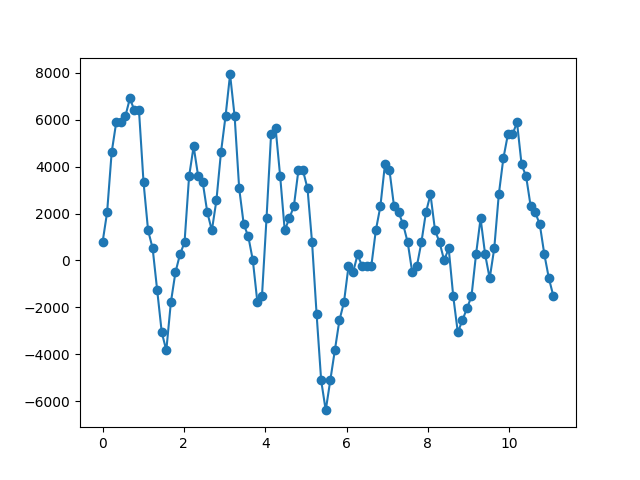

In [239]:
plt.figure()
plt.plot(times[:100]*1e6, caps['real'][0][:100], 'o-')
plt.show()


In [240]:
#Find the power
power = get_power(caps['real'][0], caps['imaginary'][0])

<IPython.core.display.Javascript object>


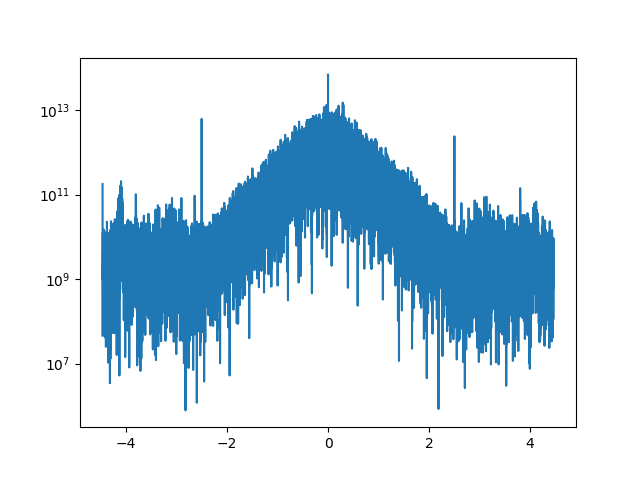

In [242]:
plt.figure()
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power))

In [166]:
1.42-1.422

-0.0020000000000000018

In [123]:
62.5/62

1.0080645161290323